In [1]:
%matplotlib inline

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sgmresearchbase.coint.space import johansen, normalise
from sgmresearchbase.coint.common import is_nonstationary
from sgmresearchbase.coint.services import _us
from sgmresearchbase.coint.projection import project
from sgmresearchbase.coint.simulation import dgp, dgp_rw, dgp2

In [4]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 8)

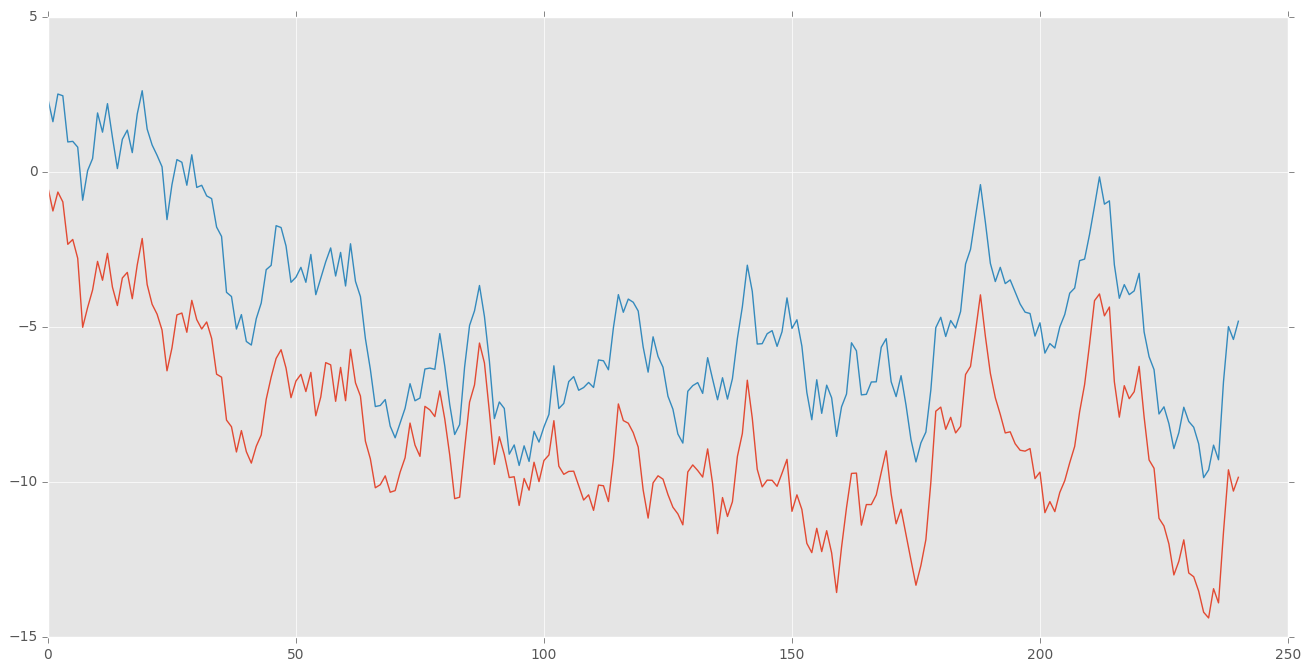

In [21]:
X = dgp_rw().T
plt.plot(X)

In [27]:
np.dot(b[:, 0], b[:, 1])

-0.15149054528078543

In [25]:
b = johansen(X, 2)

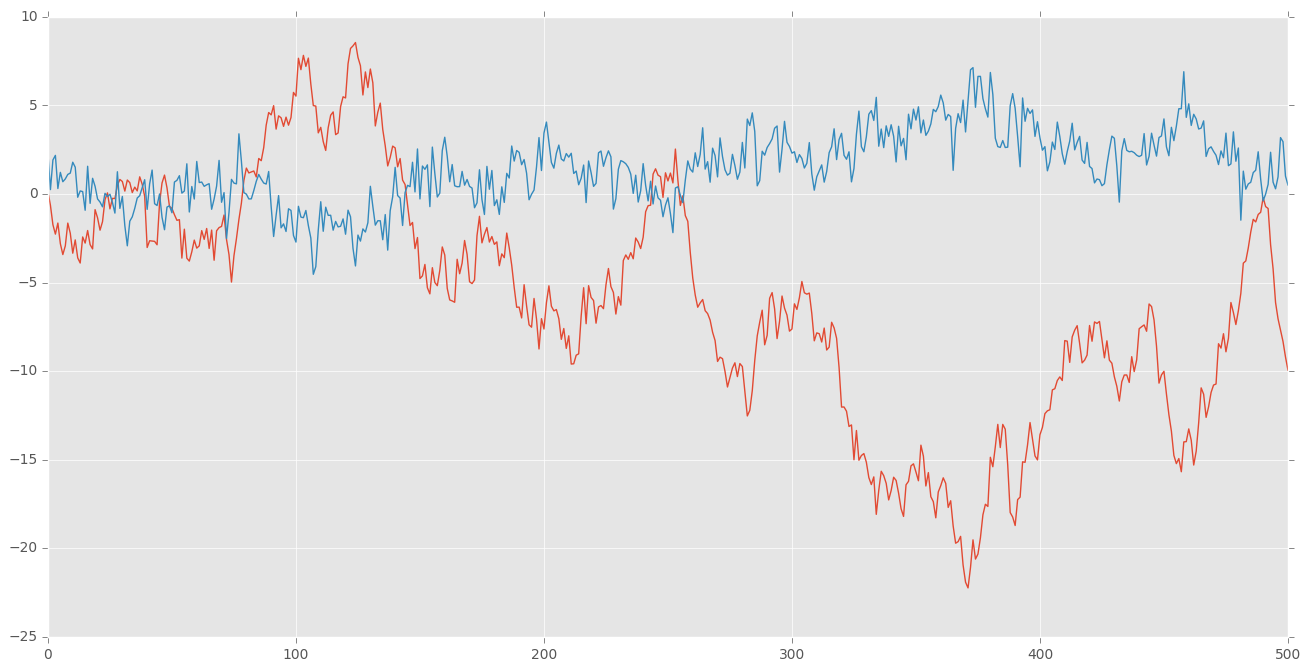

In [28]:
X, beta = dgp2(2, 1, eigen_adjust=0.30, t_term=500)
plt.plot(X)

In [33]:
np.linalg.norm(beta)

1.0

In [32]:
beta

array([[ 0.2461025 ],
       [ 0.96924381]])

In [45]:
b = normalise(johansen(X, 1, model=0))

In [50]:
from sgmresearchbase.coint.common import hurst_naive

hurst_naive(project(X))

0.019868178197492124

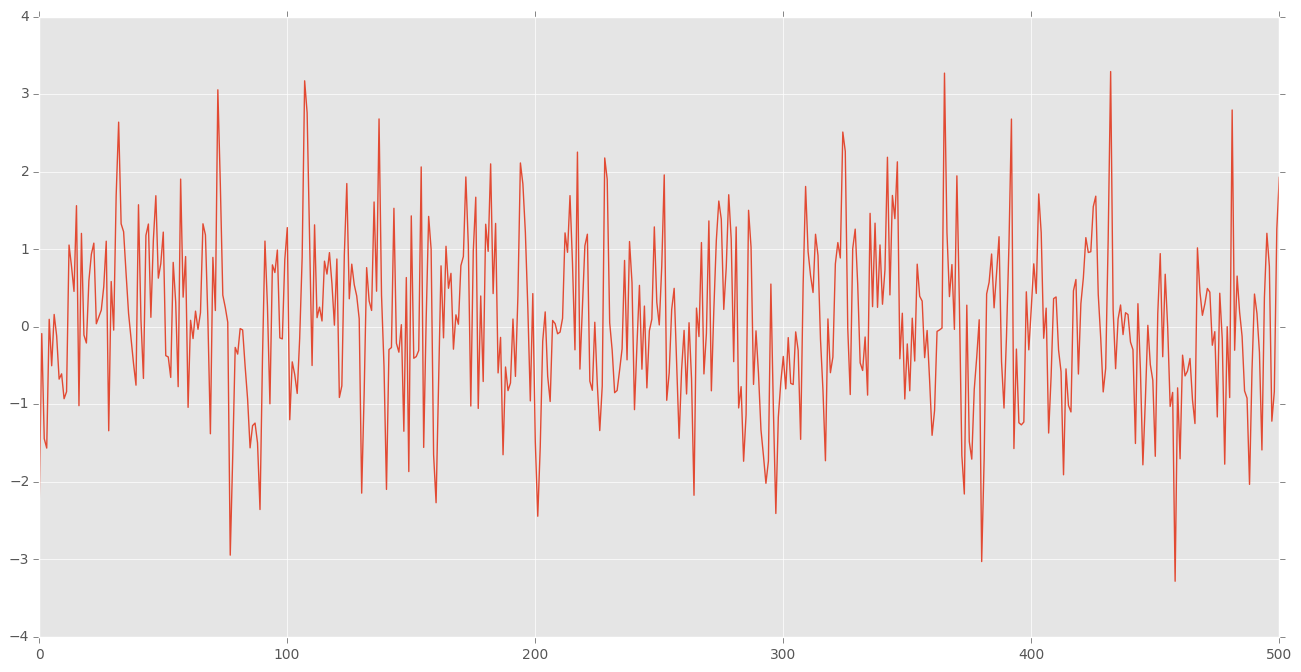

In [48]:
plt.plot(project(X, space=b))

/home/tspooner/.venv/st/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


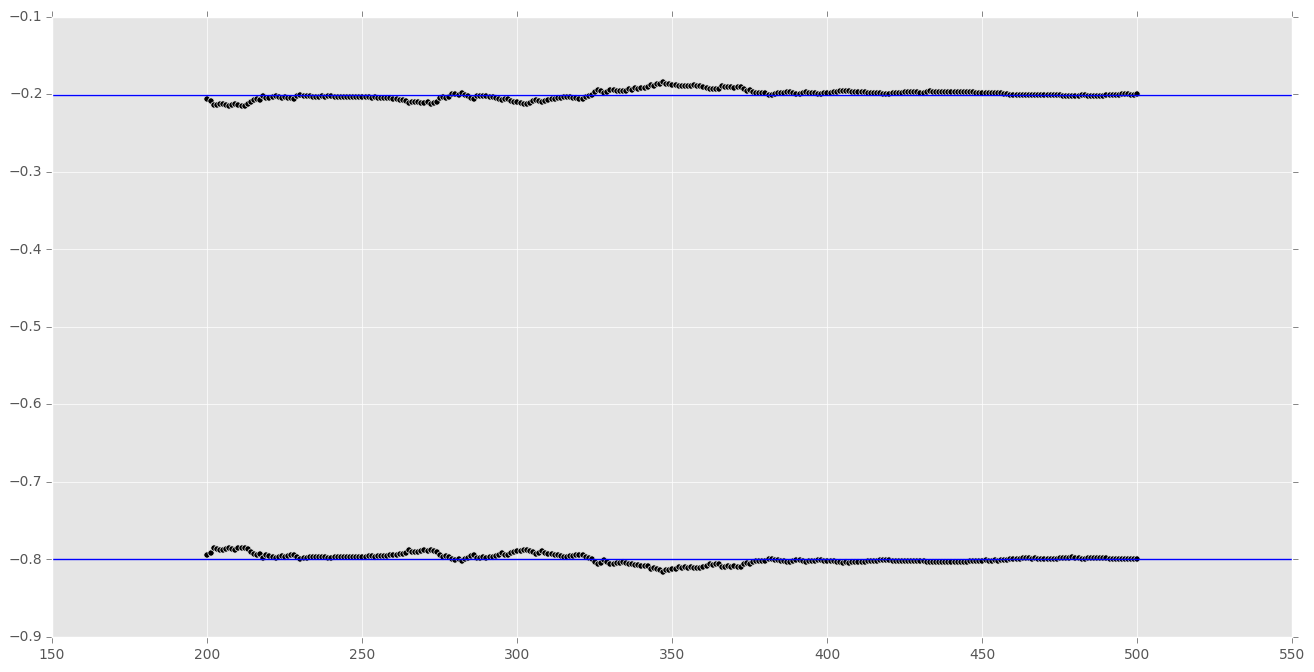

In [44]:
LB = 200

for r in np.arange(LB, X.shape[0]):
    b = johansen(X[np.arange(r-LB, r, 1), :], 2, model=0)
    b /= np.sum(np.abs(b), axis=0)
    plt.scatter([r, r], b[:, 0], c='k')
#     plt.scatter([r, r], b[:, 1], c='k', alpha=0.6)

b = johansen(X, 2, model=0)
b /= np.sum(np.abs(b), axis=0)
plt.axhline(b[0, 0])
plt.axhline(b[1, 0])
# plt.axhline(b[0, 1], c='green')
# plt.axhline(b[1, 1], c='green')

In [16]:
normalise(johansen(Xalt, 2, model=0)[:, 0])

array([ 0.6770394 , -0.73594677])

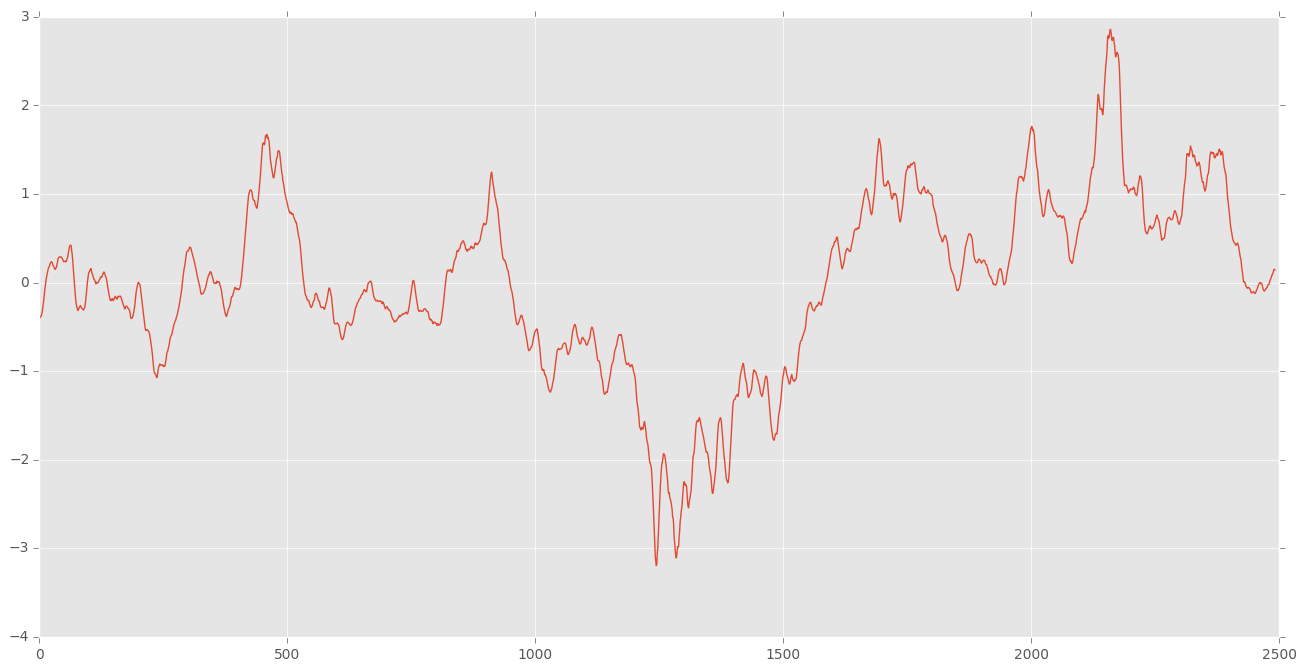

In [17]:
spd = project(Xalt, space=johansen(Xalt, 2, model=0)[:, 0])
plt.plot((spd - np.mean(spd, axis=0)) / np.std(spd, axis=0))

In [18]:
mkt1 = np.array([Xalt[:, 0]-bas, Xalt[:, 0]+bas]).T
mkt2 = np.array([Xalt[:, 1]-bas, Xalt[:, 1]+bas]).T

NameError: name 'bas' is not defined

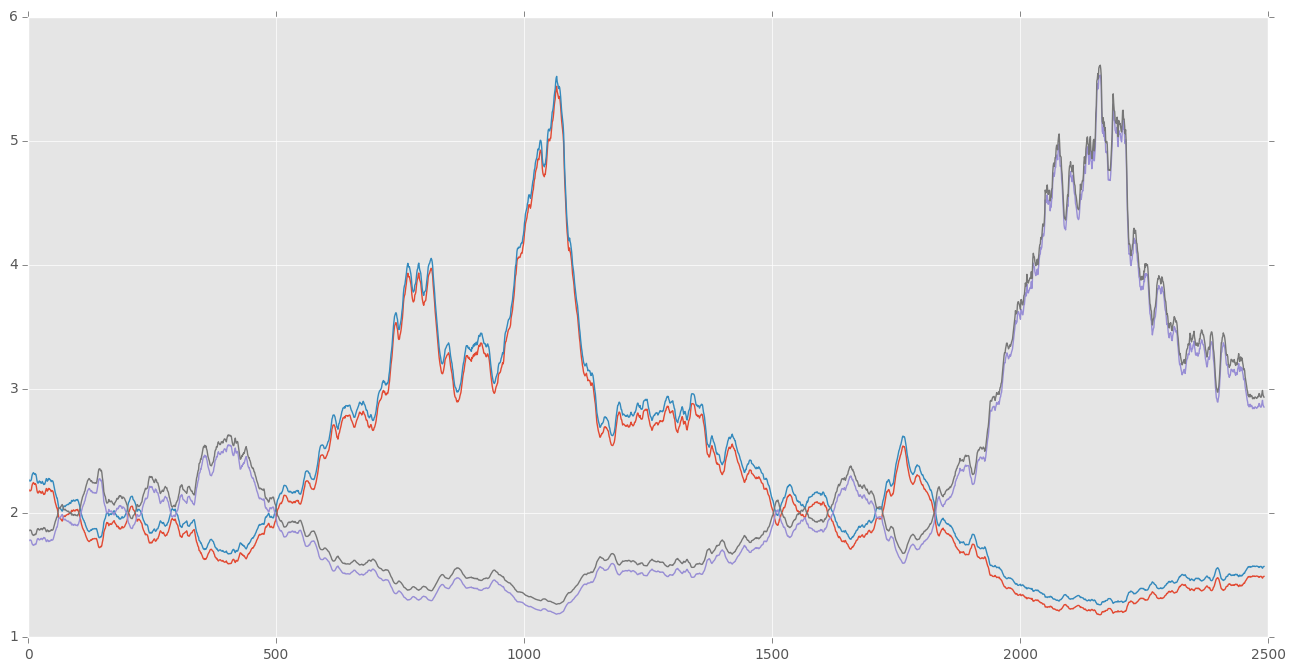

In [35]:
plt.plot(mkt1)
plt.plot(mkt2)

In [51]:
_df = pd.read_csv('./odds_BB-EENP2352830-FT12-1.BF.csv')
_df.tail()

,timestamp,status,delay,rf,bp1,bv1,bp2,bv2,bp3,bv3,lp1,lv1,lp2,lv2,lp3,lv3,total,lpm
2265,1477446563926,A,5,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.01,21184.76,1.02,2949.2,1.03,1272.29,832408.67,1.01
2266,1477446668926,A,5,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.01,21006.10,1.02,2949.2,1.03,1272.29,832408.67,1.01
2267,1477446716926,A,5,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.01,21006.10,1.02,1968.2,1.03,1272.29,832408.67,1.01
2268,1477446941926,S,5,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.01,21006.10,1.02,1968.2,1.03,1272.29,832408.67,1.01
2269,1477447100926,C,5,-1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.00,-1.00,-1.00,-1.0,-1.00,-1.00,0.00,0.00


In [87]:
_df[_df.delay > 0].head()

,timestamp,status,delay,rf,bp1,bv1,bp2,bv2,bp3,bv3,lp1,lv1,lp2,lv2,lp3,lv3,total,lpm
630,1477438616916,A,5,-1,1.22,100.00,1.21,1202.56,1.20,912.90,1.26,10.00,1.27,938.55,1.30,8.93,108641.88,1.23
631,1477438646916,A,5,-1,1.29,1523.00,1.26,2735.32,1.25,265.91,1.30,8.93,1.31,129.94,1.34,1066.75,117452.98,1.29
632,1477438676916,A,5,-1,1.22,367.97,1.21,1202.56,1.20,198.30,1.24,19.81,1.25,364.23,1.26,111.65,118385.47,1.25
633,1477438706917,A,5,-1,1.25,96.60,1.24,555.00,1.23,111.65,1.26,1096.98,1.27,1781.66,1.28,1496.47,120217.03,1.25
634,1477438736916,A,5,-1,1.22,455.79,1.21,10.71,1.20,198.30,1.25,1602.07,1.26,585.30,1.27,1851.94,122410.07,1.25


In [89]:
TICKD = 0.02

def new_df(ts):
    df = pd.DataFrame(columns=_df.columns)

    df['timestamp'] = np.arange(0, spd.shape[0]*3000, 3000) + 1477438616916
    df['status'] = 'A'
    df['delay'] = 5
    df['rf'] = -1

    df['bp1'] = np.round(ts - TICKD, 2)
    df['bp2'] = np.round(ts - 2*TICKD, 2)
    df['bp3'] = np.round(ts - 3*TICKD, 2)

    df['lp1'] = np.round(ts + TICKD, 2)
    df['lp2'] = np.round(ts + 2*TICKD, 2)
    df['lp3'] = np.round(ts + 3*TICKD, 2)

    df[['bv1', 'bv2', 'bv3', 'lv1', 'lv2', 'lv3']] = 10000.0
    df['total'] = 1000
    df['lpm'] = np.round(ts, 2)

    return df

In [91]:
new_df(Xalt[:, 1]).to_csv('/home/tspooner/.oddscache/odds_BB-EENP9977997-FT12-2.BF.csv.gz', compression='gzip')

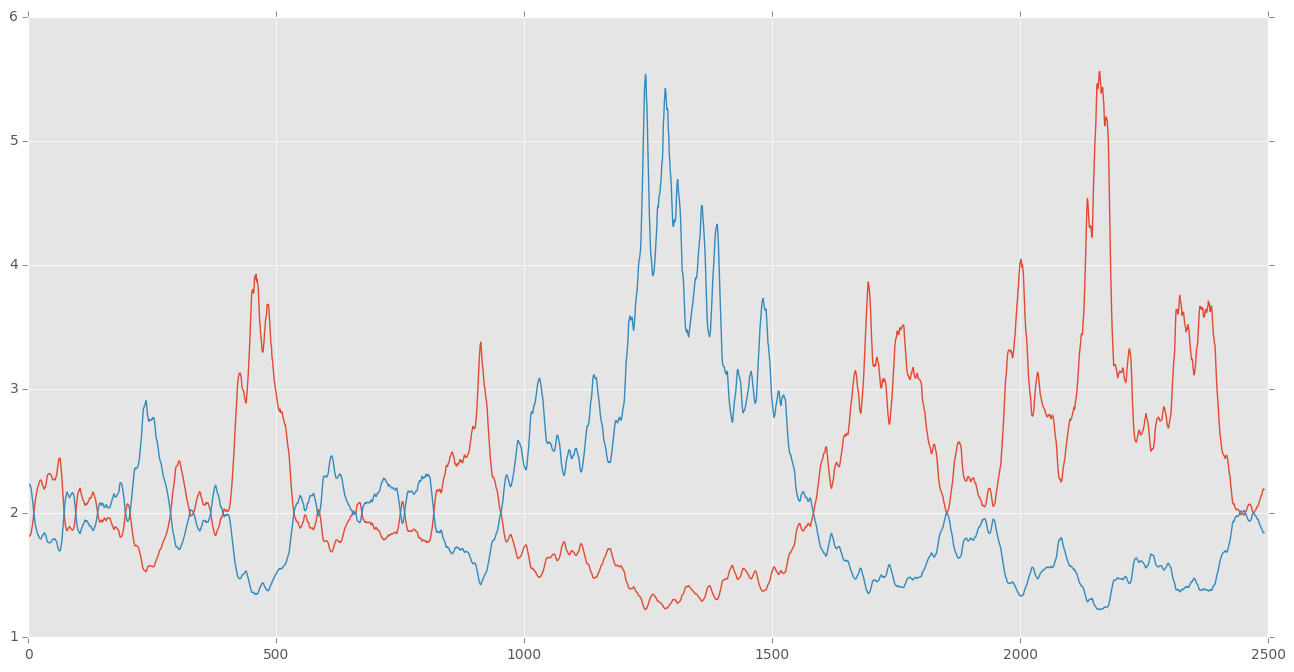

In [19]:
plt.plot(Xalt)

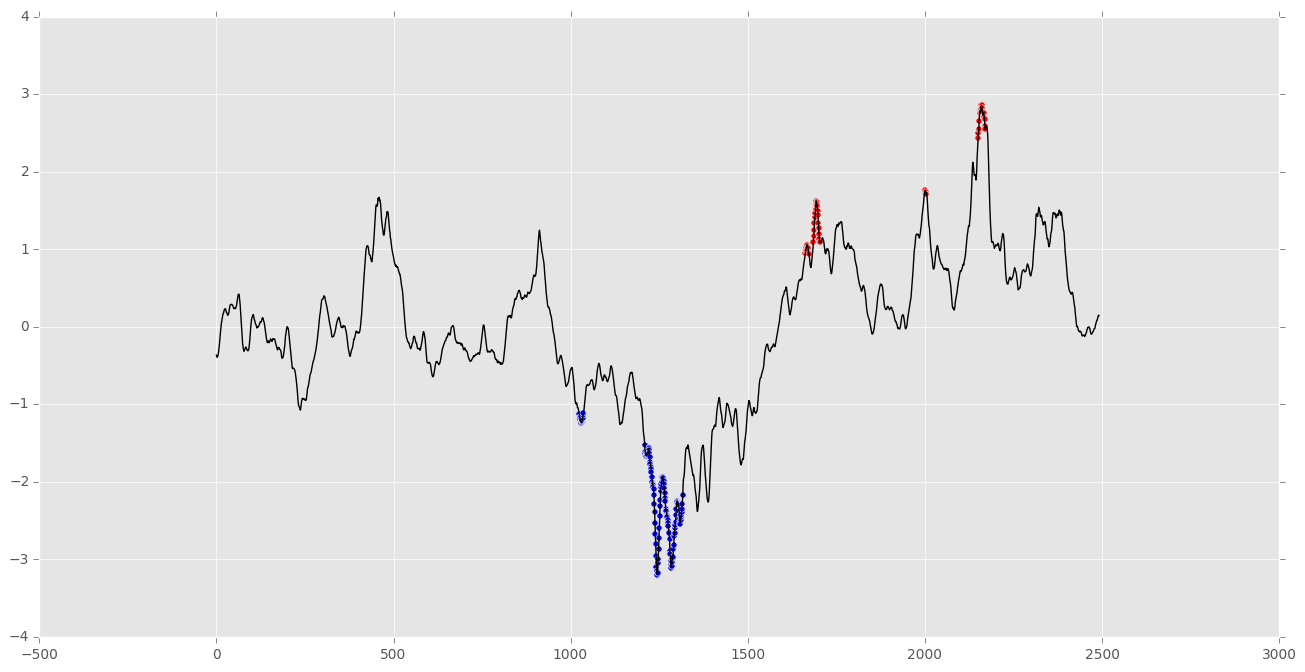

In [46]:
LB = 1000

from sgmrc.sgmcoint.services import _zs, _us
from sgmrc.sgmcoint import regression

spd = project(Xalt, space=johansen(Xalt, 2, model=0)[:, 0])
spd_scaled = (spd - np.mean(spd, axis=0)) / np.std(spd, axis=0)
plt.plot(spd_scaled, c='k')

for r in np.arange(0, Xalt.shape[0]-LB):
    b = johansen(Xalt[np.arange(r, r+LB, 1), :], 1, model=0)
    b /= np.sum(np.abs(b))
    spd = project(Xalt, b)

    if is_nonstationary(np.ravel(_zs(spd))):
        continue

    spd = _us(spd)

    rw = np.arange(0, LB, 1)
    lim = rw[-1]
    exog = regression.add_constant(rw/lim)
    endog = np.ravel(spd[r+rw])
    params, pvals = regression.coch_regression(exog, endog)

    if pvals[1] < 0.05:
        if params[1] > 0.1:
            plt.scatter([r+LB], spd_scaled[r+LB], c='r')
        elif params[1] < -0.1:
            plt.scatter([r+LB], spd_scaled[r+LB], c='b')